In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

59/59 [==============================] - 0s 2ms/step - loss: 26.7119
Test Loss: 26.711894989013672
59/59 [==============================] - 0s 2ms/step
RMSE: 5.168355377767074
Accuracy: 0.6605838505466344


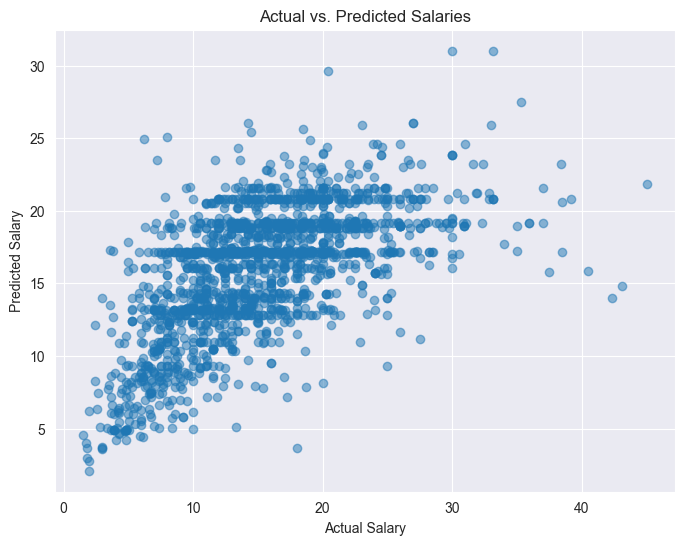

MSE: 26.711894989013672
RMSE: 5.168355153142407
Top 10 Features: Index(['job_title_Data DevOps Engineer', 'job_title_Cloud Data Architect',
       'job_title_AI Research Engineer',
       'job_title_Machine Learning Research Engineer',
       'job_title_Data Visualization Analyst', 'job_title_Data Manager',
       'job_title_Data Analytics Engineer', 'job_title_Data Modeller',
       'job_title_Power BI Developer',
       'job_title_Computer Vision Software Engineer'],
      dtype='object')


In [2]:
# Load the data
data = pd.read_csv('jobs_in_data.csv')

# Encode categorical variables
data = pd.get_dummies(data)

# Divide the 'salary' column by 10000
data['salary_in_usd'] /= 10000

# Separate features and target
X = data.drop(columns=['salary_in_usd', 'salary'])
y = data['salary_in_usd']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)

# Make predictions on the test set
predictions = model.predict(X_test_scaled).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)

# Calculate Accuracy
accuracy = 1 - (rmse / y_test.mean())
print('Accuracy:', accuracy)

# Visualize Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, predictions)
# print('Mean Absolute Error:', mae)
print('MSE:', loss)
print('RMSE:', np.sqrt(loss))

# Feature Importance
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate the importance of features based on the weights
feature_importance = np.mean(np.abs(weights), axis=0)

# Get feature names
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Top 10 features
top_features = feature_names[sorted_indices][:10]
print('Top 10 Features:', top_features)
